# Imports and Load Data

In [69]:
import numpy as np  # linear algebra
import pandas as pd # data processing, like text ,CSV or pdf file

df = pd.read_csv(r'C:\Users\AR 161\Desktop\Final Project\kindle_reviews.csv')  #here r is uni code


In [70]:
df.head(10)   # here i check data by using head function also we pass perameter in integer value  

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
5,5,B000F83SZQ,"[0, 0]",4,A beautiful in-depth character description mak...,"05 26, 2014",A1RK2OCZDSGC6R,ubavka seirovska,Review,1401062400
6,6,B000F83SZQ,"[0, 0]",4,I enjoyed this one tho I'm not sure why it's c...,"06 10, 2014",A2HSAKHC3IBRE6,Wolfmist,Nice old fashioned story,1402358400
7,7,B000F83SZQ,"[1, 1]",4,Never heard of Amy Brewster. But I don't need ...,"03 22, 2014",A3DE6XGZ2EPADS,WPY,Enjoyable reading and reminding the old times,1395446400
8,8,B000FA64PA,"[0, 0]",5,Darth Maul working under cloak of darkness com...,"10 11, 2013",A1UG4Q4D3OAH3A,dsa,Darth Maul,1381449600
9,9,B000FA64PA,"[0, 0]",4,This is a short story focused on Darth Maul's ...,"02 13, 2011",AQZH7YTWQPOBE,Enjolras,"Not bad, not exceptional",1297555200


In [71]:
len(df)   # here i check the lenght 

982619

In [72]:
df.isnull().sum()   # for missing value 

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

In [73]:
#drop the rows where there are no reviews
df.dropna(subset = ['reviewText'], inplace = True)

#changing the reviewTime column to be of datetime type
df.reviewTime = pd.to_datetime(df.reviewTime)

#creating a column with just the year so in this way we can also easily find review of each years
df['Year'] = df.reviewTime.dt.year

#show 7 top value of each row 
df.head(7)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Year
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400,2014
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600,2014
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014
5,5,B000F83SZQ,"[0, 0]",4,A beautiful in-depth character description mak...,2014-05-26,A1RK2OCZDSGC6R,ubavka seirovska,Review,1401062400,2014
6,6,B000F83SZQ,"[0, 0]",4,I enjoyed this one tho I'm not sure why it's c...,2014-06-10,A2HSAKHC3IBRE6,Wolfmist,Nice old fashioned story,1402358400,2014


# Analyse data with graphically representation 

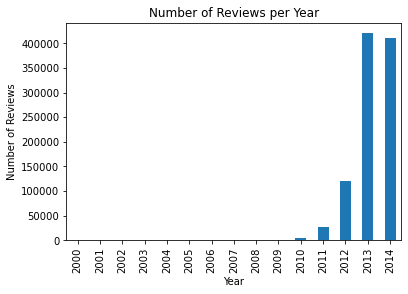

In [74]:
import matplotlib.pyplot as plt  # for graphically representation 
df.Year.value_counts().sort_index().plot(kind = 'bar')  
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

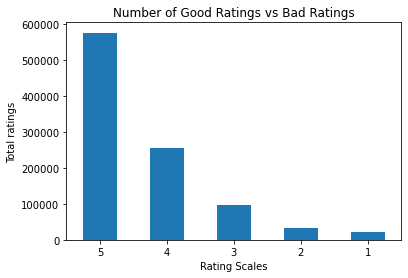

In [75]:
df.overall.value_counts().plot(kind = 'bar')
plt.title('Number of Good Ratings vs Bad Ratings')
plt.xlabel('Rating Scales')
plt.xticks(rotation = 0)
plt.ylabel('Total ratings')
plt.show()

# Text Preprocessing

In [76]:
del df['Unnamed: 0']
del df['asin']         # here i delete All unless column
del df['helpful']
del df['reviewTime']
del df['reviewerID']
del df['reviewerName']
del df['unixReviewTime']

In [77]:
df.head(10)  # again check datast 

,overall,reviewText,summary,Year
0,5,I enjoy vintage books and movies so I enjoyed ...,Nice vintage story,2014
1,4,This book is a reissue of an old one; the auth...,Different...,2014
2,4,This was a fairly interesting read. It had ol...,Oldie,2014
3,5,I'd never read any of the Amy Brewster mysteri...,I really liked it.,2014
4,4,"If you like period pieces - clothing, lingo, y...",Period Mystery,2014
5,4,A beautiful in-depth character description mak...,Review,2014
6,4,I enjoyed this one tho I'm not sure why it's c...,Nice old fashioned story,2014
7,4,Never heard of Amy Brewster. But I don't need ...,Enjoyable reading and reminding the old times,2014
8,5,Darth Maul working under cloak of darkness com...,Darth Maul,2013
9,4,This is a short story focused on Darth Maul's ...,"Not bad, not exceptional",2011


In [78]:
df.info()  # for information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982597 entries, 0 to 982618
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     982597 non-null  int64 
 1   reviewText  982597 non-null  object
 2   summary     982596 non-null  object
 3   Year        982597 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 37.5+ MB


In [79]:
del df['Year'] # here i delete column of year

In [80]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982597 entries, 0 to 982618
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     982597 non-null  int64 
 1   reviewText  982597 non-null  object
 2   summary     982596 non-null  object
dtypes: int64(1), object(2)
memory usage: 30.0+ MB


In [81]:
df.head(10)

,overall,reviewText,summary
0,5,I enjoy vintage books and movies so I enjoyed ...,Nice vintage story
1,4,This book is a reissue of an old one; the auth...,Different...
2,4,This was a fairly interesting read. It had ol...,Oldie
3,5,I'd never read any of the Amy Brewster mysteri...,I really liked it.
4,4,"If you like period pieces - clothing, lingo, y...",Period Mystery
5,4,A beautiful in-depth character description mak...,Review
6,4,I enjoyed this one tho I'm not sure why it's c...,Nice old fashioned story
7,4,Never heard of Amy Brewster. But I don't need ...,Enjoyable reading and reminding the old times
8,5,Darth Maul working under cloak of darkness com...,Darth Maul
9,4,This is a short story focused on Darth Maul's ...,"Not bad, not exceptional"


In [82]:
df.isnull().sum()  # for missing value 

overall       0
reviewText    0
summary       1
dtype: int64

In [83]:
df['reviewText'] = df['reviewText'] + ' ' + df['summary']  # i combine here summery and reviewText 

In [84]:
del df['summary']  # now the summary column delete because in above i combine data of summery and reviewText

In [85]:
df.head(10)  # again cll 

,overall,reviewText
0,5,I enjoy vintage books and movies so I enjoyed ...
1,4,This book is a reissue of an old one; the auth...
2,4,This was a fairly interesting read. It had ol...
3,5,I'd never read any of the Amy Brewster mysteri...
4,4,"If you like period pieces - clothing, lingo, y..."
5,4,A beautiful in-depth character description mak...
6,4,I enjoyed this one tho I'm not sure why it's c...
7,4,Never heard of Amy Brewster. But I don't need ...
8,5,Darth Maul working under cloak of darkness com...
9,4,This is a short story focused on Darth Maul's ...


In [86]:
def review_sentiment(rating): 
    # Replacing rating of 1,2,3 with 0(not good) and 4,5 with 1(good) 
    if(rating == 1 or rating == 2 or rating == 3):
        return 0
    else:
        return 1

In [87]:
df.overall = df.overall.apply(review_sentiment)
df.head()

,overall,reviewText
0,1,I enjoy vintage books and movies so I enjoyed ...
1,1,This book is a reissue of an old one; the auth...
2,1,This was a fairly interesting read. It had ol...
3,1,I'd never read any of the Amy Brewster mysteri...
4,1,"If you like period pieces - clothing, lingo, y..."


In [88]:
df.overall.value_counts()

1    829256
0    153341
Name: overall, dtype: int64

In [89]:
df.isnull().sum() # check missing value

overall       0
reviewText    1
dtype: int64

In [90]:
#drop the rows where there are no reviews
df.dropna(subset = ['reviewText'], inplace = True)

In [91]:
df.isnull().sum() # here we can see no missing value 

overall       0
reviewText    0
dtype: int64

In [92]:
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [93]:
def clean_text(text):  # function for data cleaning 
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = i.strip().lower()
            final_text.append(word)
    return " ".join(final_text) 

In [94]:
df['reviewText'] = df['reviewText'].apply(clean_text)

# LSTM Model

In [95]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers.embeddings import Embedding

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.reviewText,df.overall,test_size=0.5, random_state=42)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 491298 training examples and 491298 validation examples. 

Show a review in the training set : 
 genetically modified organisms book helpful understanding history, founded, used today. also gives explanation safety precautions controversies use gmo. genetically modified organism used various products, tobacco, growth hormones, crops. caused safety concerns modified organism soil harmful environment. also food also harmful bodies, one example causing allergies. gmo also used create medicine helps us cure sickness, insulin diabetics. like everything pros cons, need educate type information. gmo


(820207    read 1ns series, enjoy usually end upset autho...
 245510    say, story got right point. bad much faster wa...
 426822    forest forsaken: witch's snare dark intense ta...
 130834    &#8220;does anyone fan? need fan. story hot!&#...
 488962    grandson 3 1/2 years loved book, delighted nan...
                                 ...                        
 259184    one best books i've seen get started drawing c...
 365847    love continuation jules noah. thought story fl...
 131933    great read. liked characters excited mary beth...
 671171    loved ross books, one me. get characters. gabb...
 121959    mourning loss husband unborn baby, dr. emilie ...
 Name: reviewText, Length: 491298, dtype: object,
 820207    1
 245510    0
 426822    1
 130834    1
 488962    1
          ..
 259184    1
 365847    1
 131933    1
 671171    0
 121959    1
 Name: overall, Length: 491298, dtype: int64)

In [97]:
top_words = 20000 
maxlen = 100 
batch_size = 32
nb_classes = 2
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape)
print("========================================")
print('X_test shape:', X_test_seq.shape)
print("========================================")
print('y_train shape:', y_train_seq.shape)
print("========================================")
print('y_test shape:', y_test_seq.shape)
print("========================================")

C:\Users\AR 161\anaconda3\lib\site-packages\keras_preprocessing\text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


X_train shape: (491298, 100)
X_test shape: (491298, 100)
y_train shape: (491298, 2)
y_test shape: (491298, 2)


In [98]:
model1 = Sequential()
model1.add(Embedding(top_words, 128))
model1.add(LSTM(128,return_sequences=True)) 
model1.add(Dropout(0.2))
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

# Compile LSTM
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 2)           258       
_________________________________________________________________
activation_1 (Activation)    (None, None, 2)           0         
Total params: 2,691,842
Trainable params: 2,691,842
Non-trainable params: 0
_________________________________________________________________


In [99]:
model1.predict(X_test_seq)

array([[[0.49945438, 0.5005456 ],
        [0.4997134 , 0.50028664],
        [0.5004243 , 0.4995757 ],
        ...,
        [0.49849102, 0.50150895],
        [0.50057685, 0.49942318],
        [0.49783912, 0.5021609 ]],

       [[0.49945438, 0.5005456 ],
        [0.4997134 , 0.50028664],
        [0.5004243 , 0.4995757 ],
        ...,
        [0.49379528, 0.5062047 ],
        [0.49721628, 0.5027837 ],
        [0.49552277, 0.50447726]],

       [[0.4952088 , 0.5047912 ],
        [0.49703407, 0.50296587],
        [0.4974281 , 0.50257194],
        ...,
        [0.49550563, 0.50449437],
        [0.4974337 , 0.50256634],
        [0.503304  , 0.49669603]],

       ...,

       [[0.49945438, 0.5005456 ],
        [0.4997134 , 0.50028664],
        [0.5004243 , 0.4995757 ],
        ...,
        [0.4947879 , 0.5052121 ],
        [0.49465442, 0.50534564],
        [0.49289227, 0.5071077 ]],

       [[0.49945438, 0.5005456 ],
        [0.4997134 , 0.50028664],
        [0.5004243 , 0.4995757 ],
        .

In [36]:
model1.predict_classes(X_test_seq)

C:\Users\AR 161\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 0]], dtype=int64)

In [100]:
model1.metrics_names

[]

In [101]:
predictions = model1.predict_classes(X_test_seq)

C:\Users\AR 161\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [102]:
predictions

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 0, 0]], dtype=int64)

In [103]:
y_test_seq.argmax(axis=1)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [113]:
# Model evluation
yy_train = np.asarray(X_test_seq).astype('float32').reshape((-1,1))
yy_test = np.asarray(y_test_seq).astype('float32').reshape((-1,1))
score = model1.evaluate(yy_train, yy_test, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

ValueError: Data cardinality is ambiguous:
  x sizes: 49129800
  y sizes: 982596
Make sure all arrays contain the same number of samples.